In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
class Person:
    def __init__(self, talent, x, y, n):
        self.talent = talent
        self.money = [10]
        self.good = [0]
        self.bad = [0]
        self.x = x
        self.y = y

def generate_normal_variable(mean, std_dev, size=1):
    return np.random.normal(mean, std_dev, size)

def run_simulation(num_people, num_event, num_years, mag_good, mag_bad):
    #根據網路資訊 mean = 智商100 標準差為15 ，99.7大約落在55~145之間，因此我想將talent's mean預設在0.5 
    #並且將三個標準差設在0.1~0.9之間，因此設定 mean = 0.5、std_dev = 0.13
    talents = generate_normal_variable(0.5, 0.13, num_people)
    people = [Person(talent, random.uniform(0, 100), random.uniform(0, 100), num_years) for talent in talents]
    for i in range(num_years * 2):
        good_points = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(num_event)]
        bad_points = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(num_event)]

        for j in range(num_people):
            people[j].money.append(people[j].money[-1])
            people[j].good.append(0)
            people[j].bad.append(0)
            for k in range(num_event):
                good = good_points[k]
                if((people[j].x - good[0])**2 + (people[j].y - good[1])**2)**(1/2) <= 1 and random.random() < people[j].talent:
                    if random.random() < 0.9:
                        people[j].money[-1] = people[j].money[-1] * mag_good
                    else:
                        people[j].money[-1] = people[j].money[-1] * mag_good * 2
                    people[j].good[-1] = people[j].good[-1] + 1


                bad = bad_points[k]
                if((people[j].x - bad[0])**2 + (people[j].y - bad[1])**2)**(1/2) <= 1:
                    if random.random() < 0.9:
                        people[j].money[-1] = people[j].money[-1] / mag_bad
                    else:
                        people[j].money[-1] = people[j].money[-1] / (mag_bad * 2)
                    people[j].bad[-1] = people[j].bad[-1] - 1

    return people

In [3]:
people = run_simulation(1000, 250, 40, 1.5, 1.5)

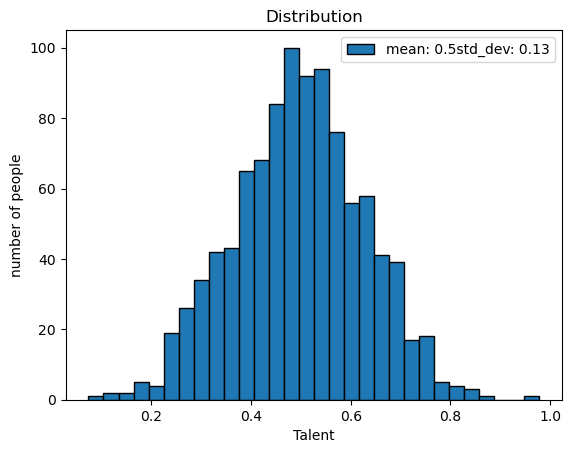

In [4]:
talents = [person.talent for person in people]
plt.hist(talents, bins=30, edgecolor='black', label = 'mean: ' +str(round(np.mean(talents),2))+'std_dev: '
         +str(round(np.std(talents), 2)))
plt.title('Distribution')
plt.xlabel('Talent')
plt.ylabel('number of people')
plt.legend()
plt.show()

In [5]:
smartest_person = max(people, key=lambda person: person.talent)
smartest_person.talent

0.9784133716332171

In [6]:
ac_person = min(people, key=lambda person: person.talent)
ac_person.talent

0.07402780811163351

In [7]:
richest_person = max(people, key=lambda person: person.money[-1])


print("最富有的人的財富:", richest_person.money[-1])
print("最富有的人的才能:", richest_person.talent)
print("最富有的人的(x, y):", richest_person.x, richest_person.y)

最富有的人的財富: 455.625
最富有的人的才能: 0.6219549057819374
最富有的人的(x, y): 39.82023661108427 54.11742171414382


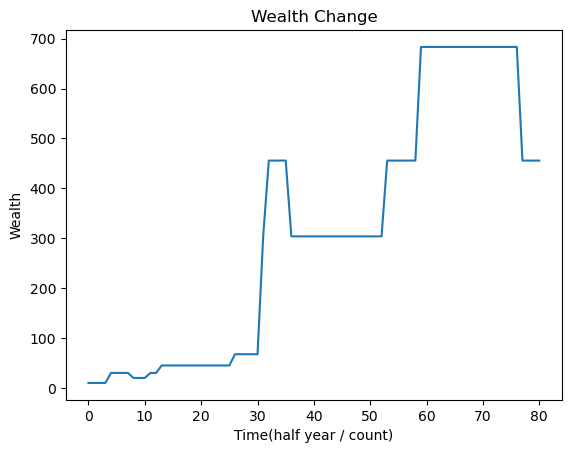

In [8]:
plt.plot(richest_person.money)
plt.title('Wealth Change')
plt.xlabel('Time(half year / count)')
plt.ylabel('Wealth')
plt.show()

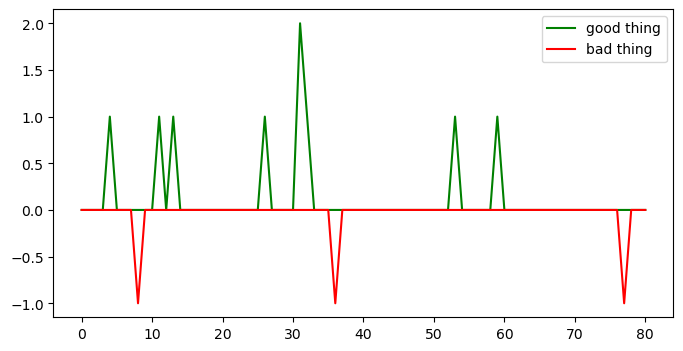

In [9]:
plt.figure(figsize = (8,4))
plt.plot(richest_person.good, color = 'g', label = 'good thing')
plt.plot(richest_person.bad, color = 'r', label = 'bad thing')
plt.legend()
plt.show()

In [10]:
poorest_person = min(people, key=lambda person: person.money[-1])
print("最窮的人的財富:", poorest_person.money[-1])
print("最窮的人的才能:", poorest_person.talent)
print("最窮的人的(x, y):", poorest_person.x, poorest_person.y)

最窮的人的財富: 0.006422788857715781
最窮的人的才能: 0.5414250396521108
最窮的人的(x, y): 68.46296186661877 55.09229471582658


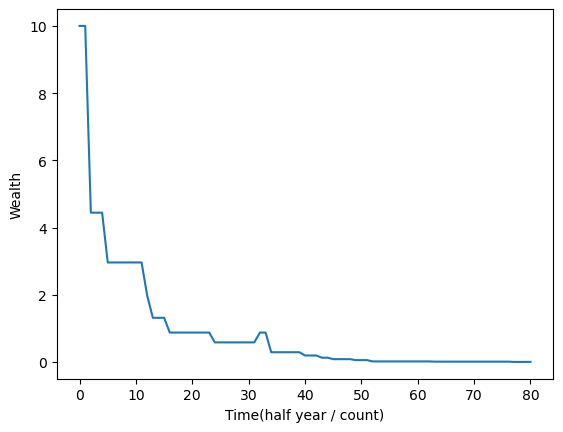

In [11]:
plt.plot(poorest_person.money)
plt.xlabel('Time(half year / count)')
plt.ylabel('Wealth')
plt.show()

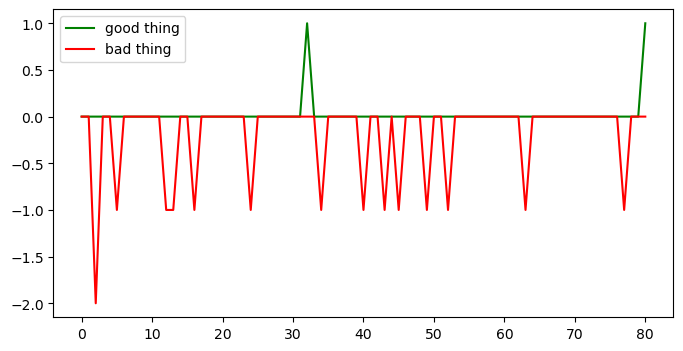

In [12]:
plt.figure(figsize = (8,4))
plt.plot(poorest_person.good, color = 'g', label = 'good thing')
plt.plot(poorest_person.bad, color = 'r', label = 'bad thing')
plt.legend()
plt.show()

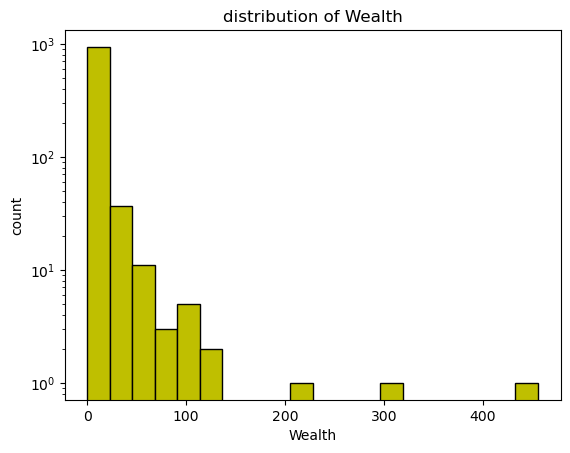

In [13]:
money_list = []
for person in people:
  money_list.append(person.money[-1])

plt.hist(money_list, bins=20, edgecolor='black', color = 'y')
plt.title('distribution of Wealth')
plt.yscale('log')
plt.xlabel('Wealth')
plt.ylabel('count')
plt.show()


455.625


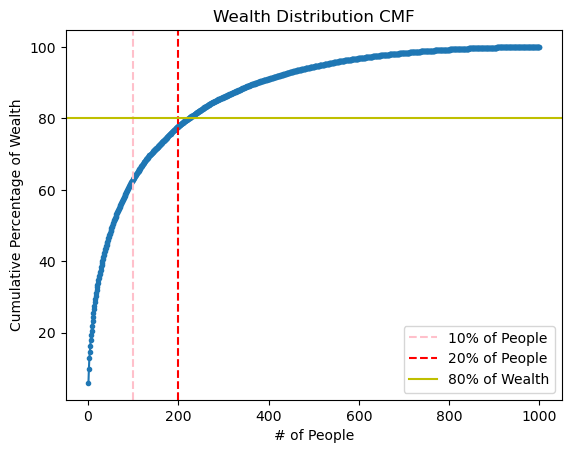

In [14]:
# 排序
money_list.sort(reverse=True)
print(money_list[0])
# CMF
cumulative_percentage = [sum(money_list[:i + 1]) / sum(money_list) * 100 for i in range(len(money_list))]

plt.plot(range(1, len(cumulative_percentage) + 1), cumulative_percentage, marker='.')
plt.axvline(x = 100, color = 'pink', linestyle = '--', label = '10% of People')
plt.axvline(x = 200, color = 'r', linestyle = '--', label = '20% of People')
plt.axhline(y = 80, color = 'y', linestyle = '-', label = '80% of Wealth')

plt.xlabel('# of People')
plt.ylabel('Cumulative Percentage of Wealth')
plt.title('Wealth Distribution CMF')
plt.legend()
plt.show()

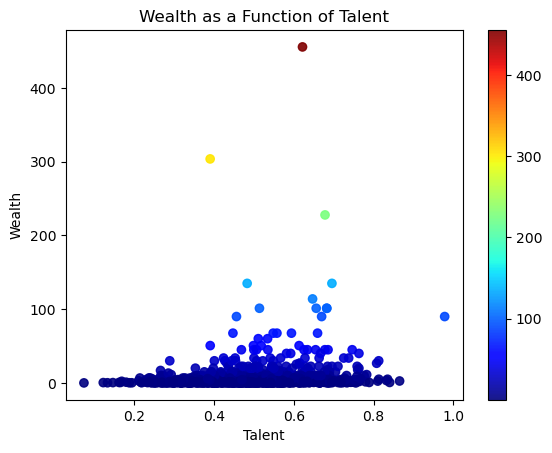

In [15]:
final_assets = [person.money[-1] for person in people]
talents = [person.talent for person in people]


plt.scatter(talents, final_assets, alpha=0.9, c=final_assets, cmap = 'jet')

plt.title('Wealth as a Function of Talent')
plt.colorbar()
plt.xlabel('Talent')
plt.ylabel('Wealth')

plt.show()

2560.0


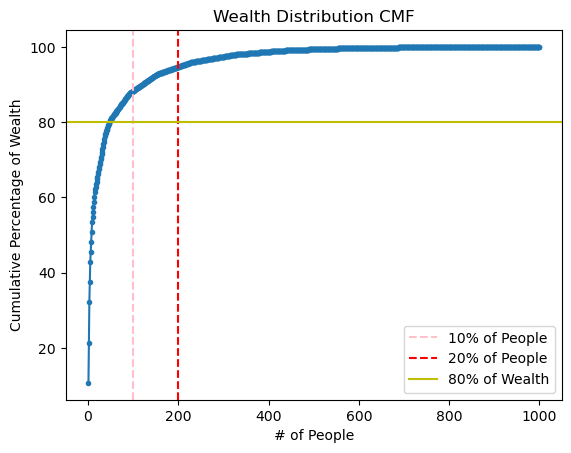

In [17]:
people2 = run_simulation(1000, 250, 40, 2, 2)
money_list2 = []
for person in people2:
    money_list2.append(person.money[-1])

# 排序
money_list2.sort(reverse=True)
print(money_list2[0])
# CMF
cumulative_percentage = [sum(money_list2[:i + 1]) / sum(money_list2) * 100 for i in range(len(money_list2))]

plt.plot(range(1, len(cumulative_percentage) + 1), cumulative_percentage, marker='.')
plt.axvline(x = 100, color = 'pink', linestyle = '--', label = '10% of People')
plt.axvline(x = 200, color = 'r', linestyle = '--', label = '20% of People')
plt.axhline(y = 80, color = 'y', linestyle = '-', label = '80% of Wealth')

plt.xlabel('# of People')
plt.ylabel('Cumulative Percentage of Wealth')
plt.title('Wealth Distribution CMF')
plt.legend()
plt.show()

In [68]:
#from concurrent.futures import ProcessPoolExecutor
#
#def simulation_round(_):
#    return max(run_simulation(100, 250, 40, 1.5, 1.5), key=lambda person: person.money[-1]).talent
#
#with ProcessPoolExecutor() as executor:
#    repeat_list = list(executor.map(simulation_round, range(1000)))

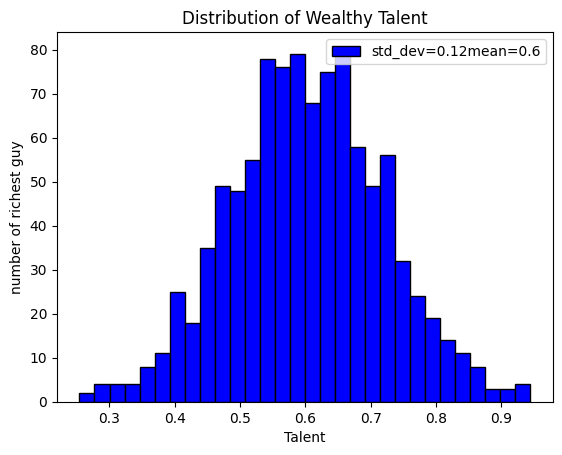

In [29]:
plt.hist(repeat_list, bins=30, edgecolor='black', color = 'b', label = 'std_dev=' + str(round(np.std(repeat_list), 2)) + 'mean=' + str(round(np.mean(repeat_list), 2)))
plt.title('Distribution of Wealthy Talent')
plt.xlabel('Talent')
plt.ylabel('number of richest guy')
plt.legend()
plt.show()